
# Komputasi Eksplorasi menggunakan Python

*Oleh Mark Bakker, TU Delft Belanda.*

*Versi Indonesia disesuaikan oleh Tim ITB dan Tim ITS.*

## *Notebook* Statistik 2: Variabel Acak Kontinu
Dalam *notebook* ini kita akan mempelajari tentang distribusi yang berkesinambungan atau kontinu. Kita mulai dengan menganalisis data yang kita buat sendiri, dan kita akan mempertimbangkan jenis data real pada akhir *notebook* ini.

Distribusi probabilitas yang paling umum (tanpa permainan kata dengan maksud lain) adalah distribusi Normal. Angka-angka acak dari distribusi Normal dapat dibuat melalui fungsi `standard_normal` dalam subpaket `random` dari `numpy`. Angka-angkanya terambil dari distribusi Normal "standar", yang berarti distribusi Normal dengan mean 0 dan standar deviasi 1. Nilai rata-rata dan standar deviasi dari sebuah dataset dapat dihitung dengan menggunakan fungsi `mean` dan `std` dari paket `numpy`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
%matplotlib inline

In [2]:
data = rnd.standard_normal(100)  # Array dengan 100 nilai
print('nilai rata-rata data: ', np.mean(data))
print('standar deviasi data: ', np.std(data))

nilai rata-rata data:  -0.00563123984746
standar deviasi data:  0.981823752122


Perhatikanlah bahwa nilai rata-rata dan standar deviasi tidak benar-benar persis bernilai 0 atau 1. Hal ini, bagaimana juga, mencoba memperkirakan arti sebenarnya dari nilai rata-rata dan standar deviasi. Perkiraan ini disebut contoh nilai rata-rata dan contoh standar deviasi (dari 100 nilai yang terambil dari distribusi Normal). Jalankan kode di atas beberapa kali. Setiap pengulangan, satu set baru dari 100 angka acak tersebut diambil, dengan sedikit perbedaan nilai rata-rata dan standar deviasi. Kita akan kembali ke persoalan tersebut nanti.

Untuk menghasilkan angka-angka dari distribusi Normal dengan nilai rata-rata $\mu$ dan standar deviasi $\sigma$, ambillah angka-angka dari distribusi Normal standar, kalikan seluruh nilai dengan $\sigma$ dan tambahkan dengan $\mu$ (lihat [di sini](http://www.statlect.com/ucdnrm1.htm)).

In [3]:
mu = 6.0
sig = 2.0
data = sig * rnd.standard_normal(100) + mu
print('nilai rata-rata data: ', np.mean(data))
print('standar deviasi data: ', np.std(data))

nilai rata-rata data:  5.81361702115
standar deviasi data:  2.02632744305


###Histogram

Salah satu hal terutama yang harus dilakukan, saat Anda mendapatkan sebuah dataset baru, adalah melihat dan memahami data tersebut. Salah satu cara melakukannya adalah dengan cara membuat histogram. Untuk sebuah histogram, Anda dapat menghitung berapa banyak poin data yang tergabung dalam satu interval tertentu. Sebagai contoh, berapa banyak poin data yang terletak di antara 5 dan 6. Interval ini disebut *bins*. Grafik batang atau *bar graph* untuk poin data dari tiap *bin* disebut histogram. Fungsi untuk menghitung dan membuat plot histogram disebut `hist` dan merupakan bagian dari paket `matplotlib`. Cara termudah membuat plot histogram adalah dengan membiarkan fungsi `hist` memutuskan *bins* mana yang harus digunakan; jumlah asal atau *default* dari *bin* adalah `nbin=10`; `hist` bahkan memperhitungkan di manakah tempat menaruh batas-batas dari sluruh *bin*. Fungsi `hist` membuat grafik histogram dan mengembalikan sebuah tupel dari tiga kelengkapan. Kelengkapan pertama adalah sebuah array dengan panjang `nbin` dan dengan jumlah poin data di tiap *bin*. Kelengkapan kedua adalah sebuah array dengan panjang `nbin+1` dan dilengkapi batas-batas dari tiap *bin*. Kelengkapan ketiga adalah sebuah daftar objek yang merepresentasikan batang-batang histogram; kita tidak akan menggunakan kelengkapan yang terakhir ini. Perhatikanlah bahwa dengan dataset berjumlah 100 poin, histogram yang diplot tidak terlihat sama persis dengan kurva berbentuk bel yang umum dari distribusi Normal, meskipun poin data yang diambil juga dari distribusi Normal yang sebenarnya. Jalankan kode di bawah beberapa kali untuk melihat bagaimana perubahannya dengan satu set data baru sebanyak 100 poin.

Jumlah poin data dari tiap bin:  [  1.   4.   6.  14.  17.  23.  14.  11.   6.   4.]
Batas tiap bin:  [  0.63877698   1.64078584   2.64279471   3.64480358   4.64681245
   5.64882131   6.65083018   7.65283905   8.65484792   9.65685678
  10.65886565]


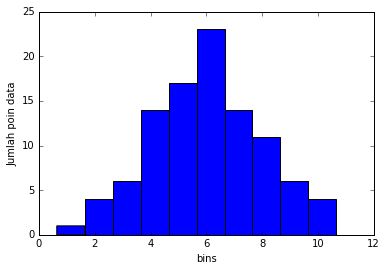

In [3]:
mu = 6.0
sig = 2.0
data = sig * rnd.standard_normal(100) + mu
a = plt.hist(data)
plt.xlabel('bins')
plt.ylabel('Jumlah poin data')
print('Jumlah poin data dari tiap bin: ',a[0])
print('Batas tiap bin: ',a[1])

Seperti yang dapat Anda lihat dari contoh sebelumnya, batas tiap bin bukanlah bilangan bulat: `hist` membawa nilai minimum dan maksimum data dan membaginya dalam `nbin` dalam interval yang sama. Sebagai alternatif, Anda dapat menentukan jumlah bin dengan kata kunci `bins` , dan lingkup atau *range* (batas minimum dan maksimum dari bin) dengan menggunakan kata kunci `range`. Jika nilai data berada di luar lingkup tersebut (seperti data-data asing atau *outliers*), data tersebut akan diabaikan. Dalam kode di bawah ini, 12 bin telah dipilih dengan besar area yang sama dari 0 sampai dengan 12. Perhatikan bahwa kita menggunakan tanggal yang sama untuk grafik di atas, tetapi hanya dengan memilih bin yang berbeda, histogram terlihat amat berbeda pula.

Jumlah poin data dari tiap bin:  [  1.   1.   3.   9.  18.  21.  18.  12.   9.   7.   1.   0.]
Jarak tiap bin:  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.]


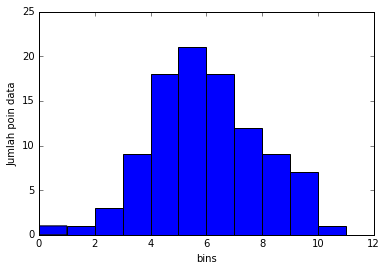

In [4]:
a = plt.hist(data, bins = 12, range = (0,12))
print('Jumlah poin data dari tiap bin: ',a[0])
print('Jarak tiap bin: ',a[1])
plt.xlabel('bins')
plt.ylabel('Jumlah poin data')

Sebuah garis yang merepresentasikan distribusi normal yang sesungguhnya dapat ditambahkan ke dalam perincian sebagai berikut.
Pertama, impor kelas `norm` dari paket `scipy.stats`. Lalu panggil fungsi `norm.pdf` (pdf merupakan singkatan dari *probability density function* atau fungsi probabilitas kepadatan) untuk menghitung nilai distribusi normal setelah diberikan tiga argumen: nilai $x$ yang digunakan untuk menghitung distribusi normal, nilai rata-rata, dan standar deviasi. Mari kita tambahkan distribusi normal tersebut ke dalam histogram yang baru saja kita buat. Satu hal yang harus kita ubah dalam histogram kita adalah sumbu vertikal. Dalam grafik di atas, sumbu vertikal memperlihatkan jumlah poin data. Kita perlu menormalisasikannya sehingga sumbu vertikalnya memberikan kemungkinan untuk sebuah poin data berada dalam sebuah bin. Histogram dapat dinormalisasikan dengan cara menentukan kata kunci `normed = True`:

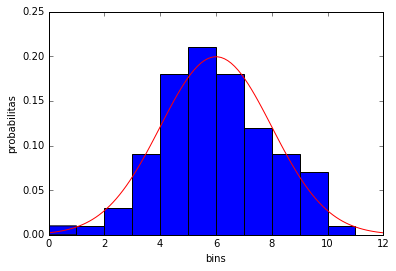

In [5]:
from scipy.stats import norm
a = plt.hist(data, bins = 12, range = (0,12), normed=True)
x = np.linspace(0,12,100)
y = norm.pdf(x,6,2) # mu=6, sig=2
plt.plot(x,y,'r')
plt.xlabel('bins')
plt.ylabel('probabilitas')

###Latihan 1: <a name="back1"></a>Histogram Pertama

Buatlah 100 angka acak dari distribusi normal dengan nilai rata-rata 100 dan standar deviasi 10. Hitung nilai rata-rata dan standar deviasinya, kemudian tampilkan pada layar. Buatlah dua grafik, yang satu di atas yang lain, dengan menggunakan perintah `subplot` (gunakan `help(subplot)` jika Anda lupa bagaimana caranya). Dalam grafik di atas, buatlah plot dari histogram tersebut dengan menggunakan 20 bin yang terletak dari 50 sampai 150. Perhatikan bahwa dengan ukuran data size sebesar ini (1000 poin data), histogram mulai terlihat seperti kurva bel (*bell-shaped curve*) dari distribusi normal. Tambahkanlah garis berwarna merah yang merepresentasikan fungsi kepadatan probabilitas atau *probability density function (PDF)* dari distribusi normal berdasarkan grafik tersebut.

Dalam grafik di bawah, buatlah histogram dari fungsi distribusi kumulatif, dengan cara mengatur kata kunci `cumulative = True` (lihat `help(hist)` untuk detail lebih lanjut). Untuk grafik berikutnya, dapat juga kita gunakan kata kunci `histtype = 'step'` dan `align='right'`. Tambahkanlah garis berwarna merah yang merepresentasikan fungsi distribusi kumulatif dari distribusi normal yang berdasarkan grafik tersebut menggunakan fungsi `norm.cdf`, yang cara kerjanya sama dengan fungsi `norm.pdf` tetapi yang dihitung adalah fungsi distribusi kumulatif atau *cumulative distribution function* (CDF). Terakhir, pastikan bahwa batas-batas sepanjang sumbu horizontal dari kedua grafik sama.

<a href="#ex1answer">Kunci Jawaban Latihan 1</a>

###Persentil

Deskripsi berguna lainnya dari dataset adalah persentil (*percentiles*) dan kuantil (*quantiles*). Untuk ini kita perhatikan urutan data; kita mengurutkan data secara menaik (*ascending*) (jadi, poin data pertama adalah data minimum dan poin data terakhir adalah maksimum). Persentil 25 adalah poin data dalam urutan di mana 25% data bernilai lebih rendah dari poin data tersebut (dan berarti 75% data bernilai lebih tinggi dari poin data tersebut). Persentil dari dataset umumnya mengacu pada "persentil empiris", karena data-data tersebut merupakan persentil dari dataset, bukan seluruh distribusi yang mendasarinya. Persentil empiris 50 ekuivalen dengan nilai tengah data. Interval umum untuk melihatnya adalah dalam wilayah 50% di sekeliling nilai tengah (juga dapat disebut daerah interkuartil atau *interquartil range (IQR)*), yang berlaku dari persentil empiris 25 sampai dengan 75, dan wilayah 95%, yang berlaku dari persentil empiris 2.5 sampai dengan 97.5. Persentil dataset dapat dihitung melalui fungsi `percentile` dalam paket `numpy` . Argumen pertama adalah datanya, dan argumen kedua adalah daftar persentilnya:

In [7]:
data = 2.0 * rnd.standard_normal(100) + 10.0  # mu = 10, sigma = 2, 100 poin
rendah, tengah, tinggi = np.percentile(data, [2.5, 50, 97.5])
print('persentil 2.5: ',rendah)
print('persentil 50: ',tengah)
print('persentil 97.5: ',tinggi)
print('interval 95%: ',rendah,' sampai dengan ',tinggi)

persentil 2.5:  5.72642689084
persentil 50:  9.90012455603
persentil 97.5:  13.4030203501
interval 95%:  5.72642689084  sampai dengan  13.4030203501


Persentil teoritis dari distribusi yang telah diberikan dapat dihitung melalui fungsi `interval`, yang memberikan interval di sekeliling nilai tengah. Sebagai contoh, wilayah 95% untuk distribusi normal standar adalah:

In [8]:
norm.interval(0.95)

(-1.959963984540054, 1.959963984540054)

Hal ini berarti persentil 95 berlaku dari -1.96 kali standar deviasi sampai dengan +1.96 kalinya.

###Latihan 2. <a name="back2"></a>Kuartil Atas dan Bawah

Buatlah 1000 poin data dari distribusi normal dengan nilai rata-rata = 20 dan standar deviasi = 4. Hitunglah daerah interkuartil (dalam wilayah 25% - 75%). Hitunglah nilai teoritis dari daerah interkuartil dan bandingkanlah dengan daerah interkuartil data. Buatlah sebuah histogram dari distribusi kumulatifnya. Tambahkan garis merah vertikal ke dalam grafik Anda untuk persentil empiris 25 dan 75 dari data, serta garis hitam vertikal dari nilai persentil empiris 25 dan 75 yang sebenarnya. Garis-garis vertikal yang terbentang pada grafik dapat ditambahkan dengan menggunakan fungsi `axvline` dari paket `matplotlib`, yang mengambil nilai $x$ dari garis sebagai sebuah argumen. Untuk memperinci warna dari garis vertikal ini, gunakanlah argumen kata kunci `color`.

<a href="#ex2answer">Kunci Jawaban Latihan 2</a>

###Plot Kotak Kumis (*Box-Whisker Plots*)

*Box-whisker plots* (untuk lebih mudahnya dapat disebut *boxplot*) adalah sebuah cara untuk memvisualisasikan level dan persebaran data. Dengan hanya melihat ke dalam sebuah *boxplot*, Anda dapat melihat apakah sebuah data simetris atau tidak, dan seberapa luas penyebaran datanya. Plot kotak kumis dapat dioperasikan dengan menggunakan fungsi `boxplot` di dalam paket `matplotlib`, sebagai berikut:

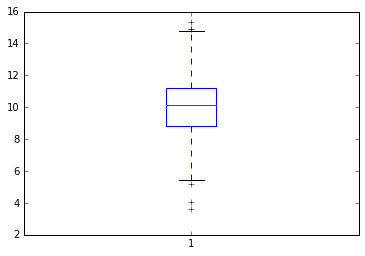

In [9]:
rnd.seed(10)
data = 2.0 * rnd.standard_normal(500) + 10.0  # mu = 10, sigma = 2, 500 poin
a = plt.boxplot(data)

Fungsi `boxplot` membuat grafik dan mengembalikan berbagai macam benda, seperti 'kotak atau *boxes*' dan 'tutup atau *caps*'. Kedua benda terakhir ini adalah poros atau pegangan untuk fitur-fitur berbeda dari grafik yang dibuat; kita tidak akan mempergunakan mereka lagi. Apa yang Anda lihat di dalam grafik adalah garis merah yang terletak di antara nilai tengah data.

Kotak biru di atas membentang pada IQR dari kuartil bawah (25%) sampai dengan kuartil atas (75%). Yang dimaksud dengan "kumis" adalah garis-garis hitam yang terhubung dengan 50% bagian kotak dengan garis biru putus-putus. Garis-garis tersebut diperpanjang sampai ke titip ekstrim poin ddata di dalam wilayah data `whis*IQR`, di mana nilai awal/*default*-nya adalah 1.5. Poin data manapun yang terposisikan di luar garis-garis kumis berpotensi untuk menjadi anomali atau *outliers* dan diplot sebagai tanda silang atau *cross*. Dalam kasus ini, terdapat 5 poin di luar garis-garis kumis, tetapi tidak ada satupun yang merupakan data asing atau *outliers*. Poin-poin data tersebut, bagaimanapun juga, digambar dari distribusi normal!

###Pandas

Seluruh teknik yang dideskripsikan dalam *Notebook* ini juga dapat dilakukan oleh paket `pandas`. Paket ini seringkali jauh lebih mudah diaplikasikan karena memiliki lebih banyak fungsionalitas; dengan demikian paket ini dapat menangani nilai-nilai yang kosong (nilai-nilai `NaN`, sebagai contoh), dan plot yang dihasilkan sudah terlihat cantik sejak awalnya.

Fungsi `read_csv` dari paket `pandas` dapat digunakan untuk membaca data dari sebuah dokumen dan menyimpannya di dalam  `DataFrame` (lihat *Notebook* 5). Sebuah `DataFrame` juga dapat dibentuk dari nol/kondisi awal. Pertama, paket `pandas` diimpor dan disebut `pd`. Kemudian sebuah `DataFrame` kosong dibuat dan nilainya ditambahkan ke dalam dua kolom dengan cara menggambarkan dua distribusi normal yang berbeda, dan kolumnya akan diberikan nama `test1` dan `test2`. Kemudian, fungsi `describe` dari `pandas` memberikan rangkuman yang baik mengenai data, termasuk jumlah nilai-nilainya, nilai rata-rata, standar deviasi, nilai-nilai minimum, persentil 25%, 50%, 75% dan nilai-nilai maksimum.

In [6]:
import pandas as pd
data = pd.DataFrame()
data['test1'] = 2 * rnd.standard_normal(100) + 3
data['test2'] = 1 * rnd.standard_normal(100) + 5
data.describe()

,test1,test2
count,100.000000,100.000000
mean,3.040467,4.961985
std,1.798077,0.957719
min,-0.668238,2.960852
25%,1.538032,4.326759
50%,3.158866,4.976884
75%,4.473605,5.617104
max,6.331825,7.468535


Fungsi untuk mengetahui nilai-nilai seperti `mean` atau `max` dapat diperoleh untuk seluruh `DataFrame` atau untuk satu kolom dalam satu waktu. Persentil-persentil dapat diperoleh melalui fungsi `quantile`.

In [11]:
print('nilai minimum dari test1:', data.test1.min())
print('standar deviasi dari DataFrame:', data.std())
print('persentil 5% dan 95% dari test2:')
print(data.test2.quantile([0.05,0.95]))

nilai minimum dari test1: -2.6320024343
standar deviasi dari DataFrame: test1    1.883256
test2    0.933086
dtype: float64
persentil 5% dan 95% dari test2:
0.05    3.535725
0.95    6.821249
Name: test2, dtype: float64


Histogram data dapat dibuat dalam dua kolom dengan menggunakan fungsi `hist` dari paket `pandas`. Perhatikan bahwa kata kunci `sharex` perlu diatur menjadi `True` sehingga sumbu horizontalnya memiliki panjang yang sama untuk kedua histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09492A70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0951F5F0>]], dtype=object)

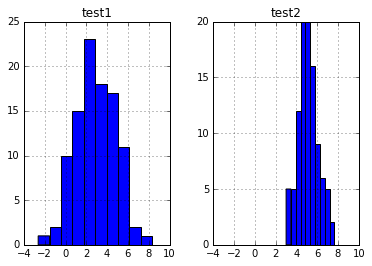

In [12]:
data.hist(sharex=True)

###Data Hilang

Data aktual terkadang kehilangan beberapa nilainya. Setiap *database* memiliki caranya masing-masing untuk memperlakukan data yang hilang. Beberapa *database* meninggalkan begitu saja nilai yang kosong, *database* lain membuat substitusi dari sebuah angka yang dapat diingat dengan mudah (contohnya -9999). Dalam `pandas`, nilai-nilai ini harus dikonversikan menjadi data yang bukan berupa angka atau *Not A Number* dengan menggunakan fungsi `NaN` dari paket `numpy` (kedua sintaks dapat digunakan, yaitu `NaN` dan `nan`). Dalam kode di bawah ini, nilai dengan indeks 5 pada kolom `test1` telah diubah menjadi `NaN`.

Fungsi `hist` dari `pandas`, sayangnya, tidak memiliki pilihan untuk menggambarkan distribusi kumulatif. Untuk itu, kita harus kembali kepada fungsi  `hist` dari `matplotlib`. Hal ini memunculkan problem lainnya, karena fungsi `hist` dari `matplotlib` tidak dapat menangani nilai-nilai `nan`. Untungnya, paket `pandas` juga memiliki fungsi `dropna`, yang akan menurunkan atau memisahkan seluruh nilai `nan` dari kolom `DataFrame`, sehingga distribusi kumulatifnya dapat diplot melalui fungsi `plt.hist`.

(array([ 0.01010101,  0.03030303,  0.13131313,  0.28282828,  0.50505051,
         0.68686869,  0.85858586,  0.96969697,  0.98989899,  1.        ]),
 array([-2.63200243, -1.53446517, -0.43692791,  0.66060935,  1.75814661,
         2.85568387,  3.95322113,  5.05075839,  6.14829566,  7.24583292,
         8.34337018]),
 <a list of 1 Patch objects>)

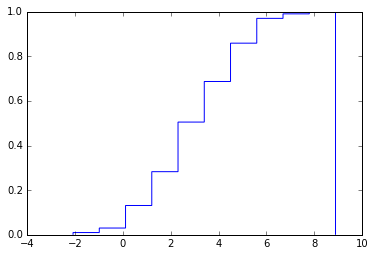

In [13]:
data.test1[5] = np.NaN  # Gantikan nilainy melalui Replace the value with index 5 to NaN
# Cobalah fungsi di bawah ini tanpa menggunakan fungsi dropna dan lihat apakah Anda mendapatkan error atau tidak
plt.hist(data.test1.dropna(), cumulative=True, histtype='step', normed=True, align='right')

`pandas` juga menggambarkan *boxplots* yang baik dari sebuah DataFrame.

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


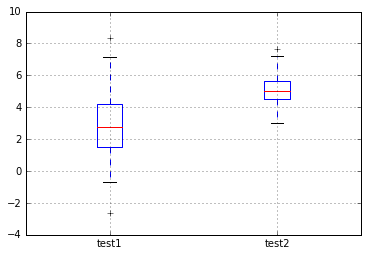

In [14]:
data.boxplot();

Histogram atau *boxplot* dari satu kolom untuk DataFrame dapat diperoleh dengan cara menentukan kolom manakah yang ingin Anda plot.

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


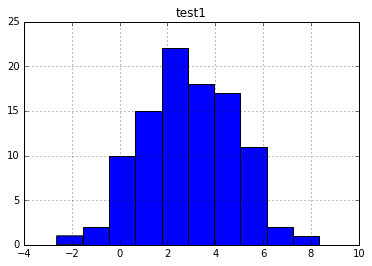

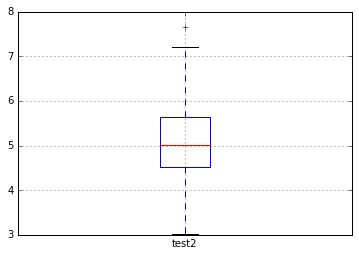

In [15]:
plt.figure()
data.hist(column='test1')  # Buat histogram dari kolom test1
plt.figure()
data. boxplot(column='test2');  # Buat boxplot dari kolom test2

Sekarang adalah waktu yang tepat untuk mengaplikasikan teknik-teknik statistik kita ke dalam dunia nyata, setelah sebelumnya pembuatan dataset hanya melalui aplikasi acak.

<figure>
<img src= "http://upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Pseudotsuga_menziesii_28236.JPG/450px-Pseudotsuga_menziesii_28236.JPG" width="200" ALIGN="right" style="padding:10px;"> 
</figure>
###Dataset Percobaan Balok Kayu

Melalui sebuah dataset dengan 356 percobaan menggunakan balok kayu, yaitu pohon cemara Douglas (lihat gambar di sebelah kanan untuk lebih spesifik), sudah disediakan dalam dokumen `douglas_data.csv` (referensi data dari Geert Ravenhorst, Timber Structures, Civil Engineering and Geosciences, TU Delft). Dokumen tersebut terdiri dari 9 kolom yang dipisahkan oleh tanda koma. Baris pertamanya (baris nomor 0) dari dokumen memuat nama-nama kolomnya. Baris kedua (baris nomor 1) memuat informasi mengenai unit-unit datanya (kita tidak akan memuat informasi ini). Kolom pertama memiliki nama sampelnya (`sample`), diikuti dengan: persentase kelembapan (`moisture`), rasio keterikatan (`knotratio`), lebar diameter lingkaran pohon dalam mm (`treering`), modulus elastisitas dinamik dalam N/mm$^2$ (`Edyn`), kepadatan kayu dalam kg/m$^3$ (`density`), tinggi balok dalam mm (`beamheight`), modulus elastisitas statis dalam N/mm$^2$ (`Estat`), dan akhirnya kekuatan tekuk dalam N/mm$^2$ (`bstrength`). Deskripsi yang lebih ekstensif dari data yang berbeda-beda ini diberikan ketika data-data tersebut dipergunakan.

###Latihan 3. <a name="back3"></a>Data Percobaan dan Operasi Awal (*Basic Operation*)

Muatlah data dalam dokumen `douglas_data.csv` menggunakan perintah `read_csv` dari paket `pandas` (mengacu pada `notebook5` untuk pengenalan tentang `pandas`). Gunakanlah  kata kunci `skiprows` dan `skipinitialspace`. Lakukan tiga perintah di bawah ini:
* Tentukan dan catat nilai minimum dan maksimum yang dapat diukur dari kekuatan tekukan.
* Tentukan dan catat nilai rata-rata dan standar deviasi dari kepadatan balok kayu.
* Tentukan dan catat persentil 2.5, 50 dan 97.5 dari lebar diameter lingkaran pohon.

<a href="#ex3answer">Kunci Jawaban Latihan 3</a>

###Latihan 4. <a name="back4"></a>*Boxplot* dari Kadar Air

Kadar air didefinisikan sebagai massa dari kelembapan di dalam balok dibagi dengan massa total balok (termasuk kelembapannya sendiri) dan dicatat sebagai sebuah persentase. Hitung dan laporkan nilai rata-rata dan standar deviasi untuk kadar air, dan buatlah *boxplot*-nya.

Ketika Anda melihat datanya, jelaslah bahwa ada sebuah komponen asing atau *outlier*. Buatlah sebuah *boxplot* baru untuk seluruh data, kecuali untuk sang komponen asing, contohnya dengan cara membuat *boxplot* untuk seluruh kadar air yang berada di bawah batas nilai tertentu. Pastikan bahwa Anda memilih batas-batas yang tepat untuk sumbu vertikalnya, yang menyebabkan garis-garis kumis dapat terlihat.

<a href="#ex4answer">Kunci Jawaban Latihan 4</a>

###Latihan 5. <a name="back5"></a>Histogram Kekuatan Tekuk

Buatlah sebuah histogram dari data kekuatan tekuk. Tambahkan label untuk sumbu-sumbunya Apakah histogram tersebut terlihat sama seperti distribusi normal? Dari grafik yang sama, gambarkan garis merah vertikal untuk kekuatan tekuk 5% yang telah ditentukan lewat pengujian. Tampilkan persentil 5 kekuatan tekuk tersebut ke layar.

<a href="#ex5answer">Kunci Jawaban Latihan 5</a>

###Latihan 6. <a name="back6"></a>Distribusi Normal untuk Kekuatan Tekuk

Mari kita coba untuk menyesuaikan distribusi normal dengan data kekuatan tekuk. Hal ini jelas tidak sepenuhnya tepat, karena ujung distribusi normal akan memanjang sampai dengan nilai di bawah nol (ke arah kiri), yang sebenarnya mustahil. Jika bagian ujung hanya sedikit di bawah nol, mungkin merupakan langkah awal yang masuk akal. Buatlah histogram kekuatan tekuk yang telah dinormalisasi. Hitunglah nilai rata-rata dan standar deviasi dari data kekuatan tekuk dan pada grafik yang sama buatlah plot fungsi kepadatan probabilitas normal menggunakan estimasi nilai rata-rata dan standar deviasi. Tambahkan lah garis merah vertikal untuk kekuatan tekuk 5% sesuai dengan data, dan garis hitam vertikal untuk kekuatan tekuk 5% sesuai dengan distribusi normal yang telah disesuaikan.

<a href="#ex6answer">Kunci Jawaban Latihan 6</a>

###Kunci Jawaban untuk Latihan-latihan

<a name="ex1answer">Kunci Jawaban Latihan 1</a>

nilai rata-rata data:  99.7412200178
standar deviasi data:  9.81858582899


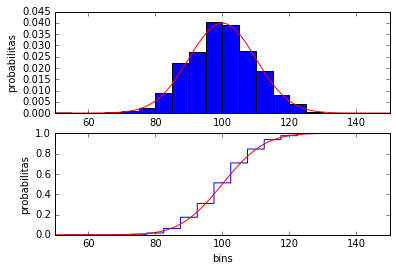

In [16]:
from scipy.stats import norm
mu = 100.0
sig = 10.0
data = sig * rnd.standard_normal(1000) + mu
print('nilai rata-rata data: ',np.mean(data))
print('standar deviasi data: ',np.std(data))
plt.subplot(211)
a = plt.hist(data, bins = 20, range = (50,150), normed=True)
x = np.linspace(50,150,100)
y = norm.pdf(x,mu,sig)
plt.plot(x,y,'r')
plt.xlim(50,150)
plt.ylabel('probabilitas')
plt.subplot(212)
b = plt.hist(data, bins = 20, range = (50,150), cumulative = True, histtype='step', normed = True, align='right')
y = norm.cdf(x,mu,sig)
plt.plot(x,y,'r')
plt.xlim(50,150)
plt.xlabel('bins')
plt.ylabel('probabilitas')

<a href="#back1">Kembali ke Latihan 1</a>

<a name="ex2answer">Kunci Jawaban Latihan 2</a>

IQR teoritis:  17.3 22.7
IQR data  17.2171409421 22.5191416905


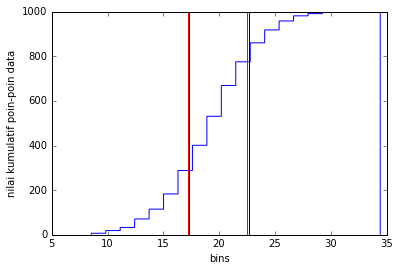

In [17]:
mu = 20.0
sig = 4.0
lower_theoretical = mu - 0.675 * sig
upper_theoretical = mu + 0.675 * sig
print('IQR teoritis: ',lower_theoretical,upper_theoretical)
data = sig * rnd.standard_normal(1000) + mu
lower, upper = np.percentile(data,[25,75])
print('IQR data ',lower,upper)
plt.hist(data, bins = 20, cumulative = True, histtype='step')
plt.axvline(lower,color='r')
plt.axvline(upper,color='r')
plt.axvline(lower_theoretical,color='k')
plt.axvline(upper_theoretical,color='k')
plt.xlabel('bins')
plt.ylabel('nilai kumulatif poin-poin data')

<a href="#back2">Kembali ke Latihan 2</a>

<a name="ex3answer">Kunci Jawaban Latihan 3</a>

In [18]:
from pandas import read_csv
w = read_csv('douglas_data.csv',skiprows=[1],skipinitialspace=True)
print('kekuatan tekuk minimum dan maksimum: ', w.bstrength.min(), w.bstrength.max())
print('nilai rata-rata dan standar deviasi: ', w.density.mean(), w.density.std())
print('lebar diameter lingkaran pohon 2.5%, 50%, 97.5%: ', np.percentile(w.treering,[2.5,50,97.5]))

kekuatan tekuk minimum dan maksimum:  15.66 101.53
nilai rata-rata dan standar deviasi:  575.724719101 62.0073830786
lebar diameter lingkaran pohon 2.5%, 50%, 97.5%:  [ 2.0475   3.78     7.00875]


In [19]:
from pandas import read_csv
w = read_csv('douglas_data.csv',skiprows=[1],skipinitialspace=True)
print('lebar diameter lingkaran pohon 2.5%, 50%, 97.5%: ', w.treering.describe(percentiles=[0.025,0.5,0.975]))

lebar diameter lingkaran pohon 2.5%, 50%, 97.5%:  count    356.000000
mean       3.954129
std        1.296985
min        1.640000
2.5%       2.047500
50%        3.780000
97.5%      7.008750
max        9.000000
Name: treering, dtype: float64


<a href="#back3">Kembali ke Latihan 3</a>

<a name="ex4answer">Kunci Jawaban Latihan 4</a>

kadar air rata-rata:  13.5539325843
standar deviasi kadar air:  1.7931673876


{'boxes': [<matplotlib.lines.Line2D at 0xaa81c90>],
 'caps': [<matplotlib.lines.Line2D at 0xaa90490>,
 'fliers': [<matplotlib.lines.Line2D at 0xaa90e50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xaa90af0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xaa81db0>,
  <matplotlib.lines.Line2D at 0xaa90150>]}

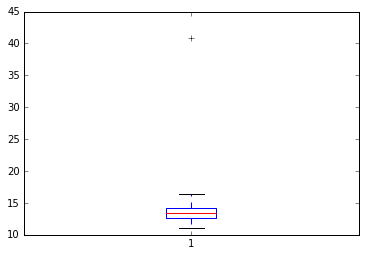

In [20]:
print('kadar air rata-rata: ', w.moisture.mean())
print('standar deviasi kadar air: ', w.moisture.std())
plt.boxplot(w.moisture)

(10.5, 17)

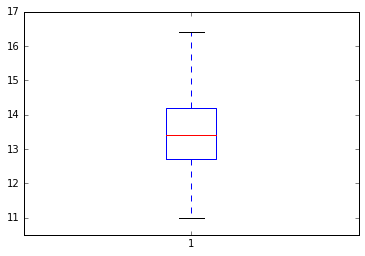

In [21]:
plt.boxplot(w.moisture[w.moisture < 30])
plt.ylim(10.5,17)

<a href="#back4">Kembali ke Latihan 4</a>

<a name="ex5answer">Kunci Jawaban Latihan 5</a>

persentase empiris 5:  22.4125


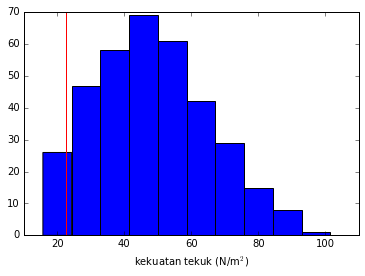

In [22]:
plt.hist(w.bstrength)
plt.xlabel('kekuatan tekuk (N/m$^2$)')
five = np.percentile(w.bstrength,5)
print('persentase empiris 5: ',five)
plt.axvline(five,color='r')

<a href="#back5">Kembali ke Latihan 5</a>

<a name="ex6answer">Kunci Jawaban Latihan 6</a>

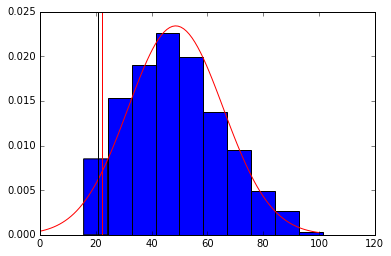

In [23]:
from scipy.stats import norm
plt.hist(w.bstrength,normed=True)
# alternative
# w.hist(column='bstrength',normed=True)
meanstrength = w.bstrength.mean()
stdstrength = w.bstrength.std()
x = np.linspace(0,100,100)
y = norm.pdf(x,loc=meanstrength,scale=stdstrength)
plt.plot(x,y,'r')
plt.axvline(five, color='r')
plt.axvline(meanstrength - 1.64*stdstrength, color='k')

<a href="#back6">Kembali ke Latihan 6</a>